# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [269]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [270]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

x_train = train[['x0', 'x1']]
x_test  = test[['x0', 'x1']]
y_train = train['y']
y_test  = test['y']

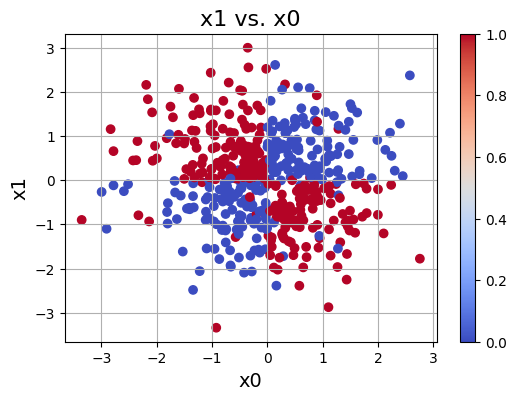

In [271]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [272]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.random import set_seed
import random
import os

In [273]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disables GPU, to avoid randomness for reproducibility
os.environ["PYTHONHASHSEED"] = "42"
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(42)
np.random.seed(42)
set_seed(42)

In [274]:
model = Sequential([
    Input(shape=(2,)),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"]
)

In [275]:
total_epochs = 50
max_lr = 0.01
warmup_epochs = round(total_epochs * 0.1)

In [276]:
def lr_schedule(epoch):
    if epoch < warmup_epochs:
        return max_lr * (epoch + 1) / warmup_epochs
    else:
        progress = (epoch - warmup_epochs) / (total_epochs - warmup_epochs)
        cosine_decay = 0.5 * (1 + np.cos(np.pi * progress))
        return max_lr * cosine_decay

custom_lr = LearningRateScheduler(lr_schedule)

In [277]:
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=0
)

In [278]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=total_epochs,
                    validation_split=0.3,
                    callbacks=[custom_lr, checkpoint]
                    )

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6771 - loss: 0.6308 - val_accuracy: 0.8400 - val_loss: 0.5769 - learning_rate: 0.0020
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8829 - loss: 0.4682 - val_accuracy: 0.9067 - val_loss: 0.3340 - learning_rate: 0.0040
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8771 - loss: 0.3787 - val_accuracy: 0.8800 - val_loss: 0.3071 - learning_rate: 0.0060
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8343 - loss: 0.4175 - val_accuracy: 0.9067 - val_loss: 0.3164 - learning_rate: 0.0080
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8971 - loss: 0.3660 - val_accuracy: 0.9267 - val_loss: 0.2920 - learning_rate: 0.0100
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9257 - loss: 0.3028 - val_accuracy: 0.9200 - val_loss: 0.2570 - learning_rate: 0.0100
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9143 - loss: 0.3211 - val_accuracy:

In [279]:
model.load_weights('best_model.keras')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {round(test_acc * 100, 2)}%")

Test Accuracy: 92.4%


In [280]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,445 (99.40 KB)

 Trainable params: 8,481 (33.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,964 (66.27 KB)

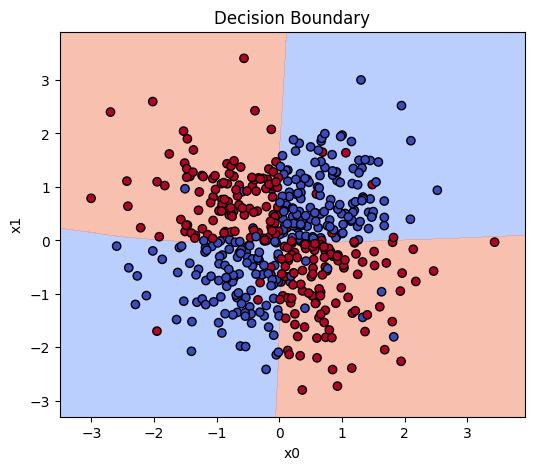

In [281]:

x_min, x_max = x_test.values[:, 0].min() - 0.5, x_test.values[:, 0].max() + 0.5
y_min, y_max = x_test.values[:, 1].min() - 0.5, x_test.values[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid = np.c_[xx.ravel(), yy.ravel()]
zz = model.predict(grid, verbose=0)
zz = zz.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.6)
plt.scatter(x_test.values[:, 0], x_test.values[:, 1], c=y_test.values, cmap="coolwarm", edgecolors='k')
plt.title("Decision Boundary")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()



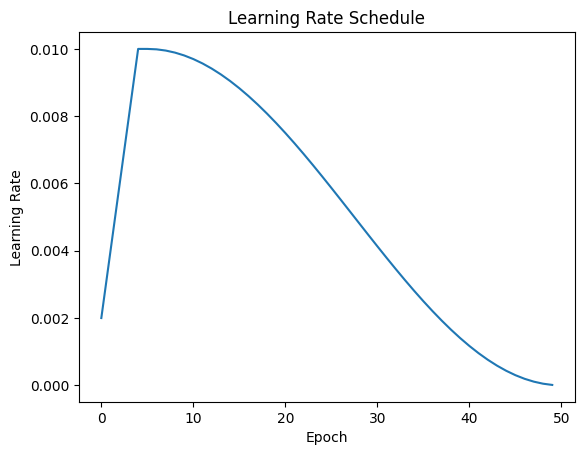

In [282]:
lrs = [lr_schedule(e) for e in range(total_epochs)]
plt.plot(lrs)
plt.title("Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.show()

# Discussion

## Reproducibility
To ensure reproducibility, I've set the random seeds for random, numpy and tensorflow, as well as some os seeds. This however wasn't enough, as I was running tensorflow with GPU acceleration. This apparently introduces more indeterministic results, giving me different model accuracy results for each run. When I had a model that seemed good, I disabled GPU utilization. Additionally, I saved the best model weights using ModelCheckpoint, ensuring that evaluation was always performed on the same version of the model.

## Optimizer
I chose the Adam optimizer. The reason for this was mainly that it seemed to converge faster that standard SGD, allowing me to stick to a lower number of epochs, which significantly improved the training speed. Adam allowed me to train faster and more reliably, which was helped during experimentation.

## Learning rate scheduling
Using a custom LR does in fact improve the accuracy of the model. The reason for this is that the warmup phase prevents bigger updates to start off with, and rather start the larger steps in cosine phase. It then gradually reduces its step size, such that it gets more and more precise

## Ablation Study
Adam, Custom LR, 50 epochs - 92.4%
Adam, Constant LR, 50 epochs - 90%
SGD, Custom LR, 50 epochs - 78.8%
SGD, Custom LR, 200 epochs - 89.2%

For other hyperparameters (max_lr, warmup_epochs, layer_size, batch_size etc.), I ran an optimization loop for checking which parameters resulted in the best accuracy. Keeping variables smaller seemed in general better, probably due to overfitting the validation split when running bigger parameters


# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [283]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [284]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


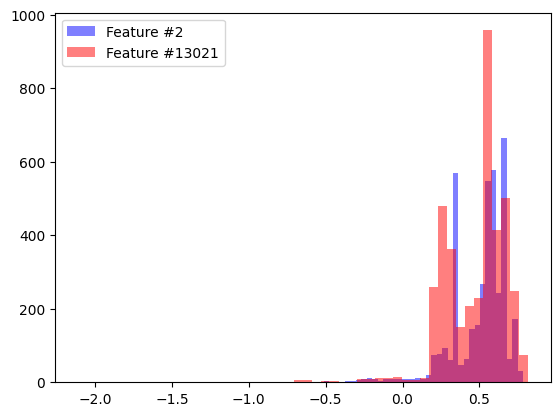

In [285]:
# Features seem to be similarly distributed...
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

In [286]:
# Checking out the first row
header_row = pd.read_csv('unsupervised_data.csv', header=None, nrows=1).iloc[0]
header_row

0         col_9858
1         col_2932
2        col_12843
3         col_5156
4         col_2677
           ...    
16379    col_13418
16380     col_5390
16381      col_860
16382    col_15795
16383     col_7270
Name: 0, Length: 16384, dtype: object

In [287]:
# Sorting the cols in their correct order
col_indices = header_row.str.replace("col_", "").astype(int)
order = col_indices.argsort()

ids = data["ID"].copy()
features = data.drop(columns=["ID"])

features_sorted = features.iloc[:, order]

data_sorted = pd.concat([ids, features_sorted], axis=1)
data_sorted

,ID,2169,13995,10946,70,15799,15075,12237,12693,1385,...,10234,8031,8981,11261,7775,566,14080,1622,15104,8162
0,0,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,...,0.475593,0.532497,0.589401,0.627337,0.655790,0.665273,0.674758,0.665273,0.655790,0.646305
1,1,-0.144320,0.383794,0.633953,0.578363,0.587628,0.587628,0.587628,0.587628,0.587628,...,0.587628,0.587628,0.587628,0.587628,0.578363,0.457915,0.068779,0.087309,0.494976,0.457915
2,2,0.590203,0.590203,0.590203,0.590203,0.590203,0.367673,0.345897,0.367673,0.367673,...,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203
3,3,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,...,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296
4,4,0.672652,0.672655,0.672929,0.677057,0.688611,0.646499,0.409348,0.064447,-0.087393,...,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,...,0.769519,0.759781,0.759779,0.759779,0.759769,0.740269,0.691551,0.642845,0.633110,0.662325
3996,3996,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,...,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221
3997,3997,0.651135,0.660433,0.623242,0.483774,0.335009,0.083968,0.279222,0.604646,0.641837,...,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.430439,0.041757,...,0.555533,0.555533,0.555533,0.269605,-0.065465,-0.011854,-0.226299,-0.186091,-0.306716,0.135577


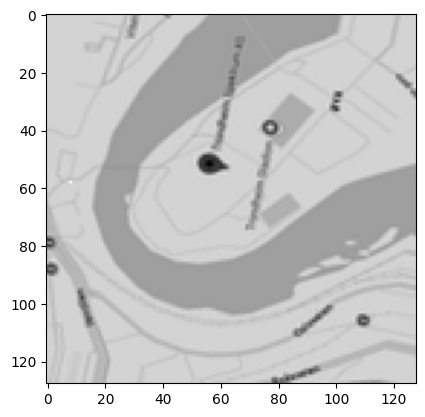

In [288]:
# 16384 = 128², which is a common image size. The image is clearly coordinates from Google Maps
img = features_sorted.iloc[0].values.reshape(128, 128)
plt.imshow(img, cmap='gray')
plt.show()

In [289]:
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import collections

In [290]:
# Transforming to 2D using PCA -> UMAP. This is to visualize the data
pca = PCA(n_components=100)
X_pca = pca.fit_transform(features_sorted)

umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42, metric='euclidean')
X_umap = umap.fit_transform(X_pca)

/home/tzr/PycharmProjects/ml-prosjekt-2/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


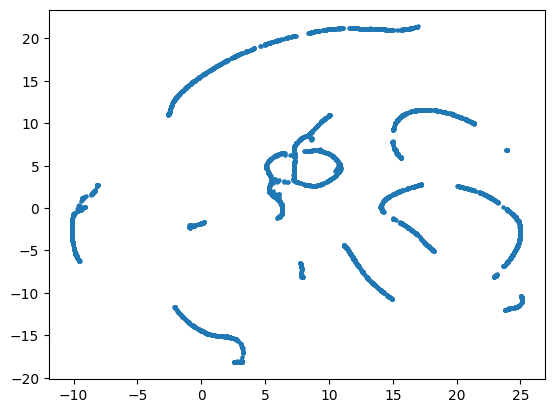

In [291]:
# Shows very clear clusters
plt.scatter(X_umap[:,0], X_umap[:,1], s=5)
plt.show()

In [292]:
# Transforming to 10D, prepping for clustering
umap_10d = UMAP(n_components=10, n_neighbors=15, min_dist=0.1, random_state=42, metric='euclidean')
X_umap_10d = umap_10d.fit_transform(features_sorted)

/home/tzr/PycharmProjects/ml-prosjekt-2/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


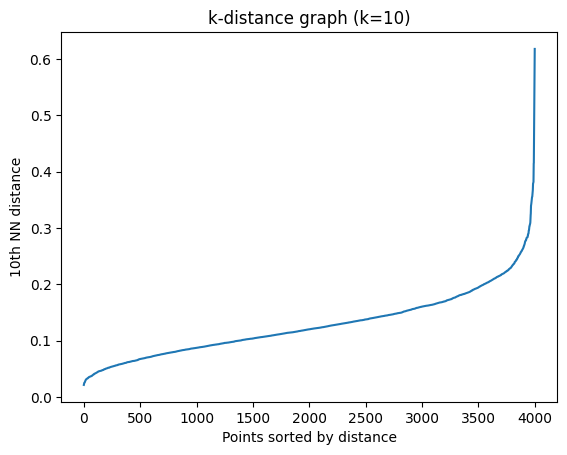

In [293]:
# Visualizing good k values to use
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X_umap_10d)
distances, indices = nbrs.kneighbors(X_umap_10d)

distances = np.sort(distances[:, 9])

plt.plot(distances)
plt.title("k-distance graph (k=10)")
plt.xlabel("Points sorted by distance")
plt.ylabel("10th NN distance")
plt.show()


In [294]:
# Running DBSCAN
dbscan = DBSCAN(eps=0.45, min_samples=10)
labels = dbscan.fit_predict(X_umap_10d)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Clusters found:", n_clusters)
print("Noise points:", n_noise)


Clusters found: 13
Noise points: 0


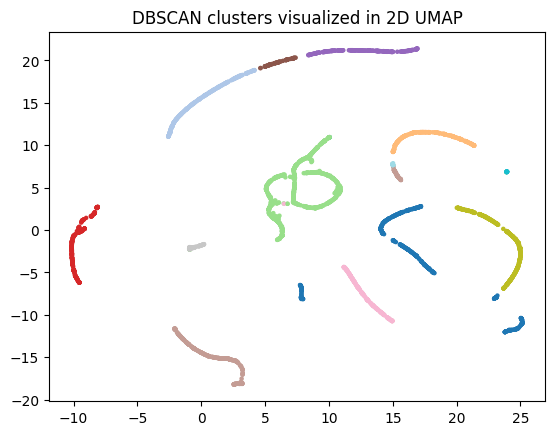

In [295]:
# Visualizing initial clusters
plt.scatter(X_umap[:,0], X_umap[:,1], c=labels, cmap='tab20', s=5)
plt.title("DBSCAN clusters visualized in 2D UMAP")
plt.show()

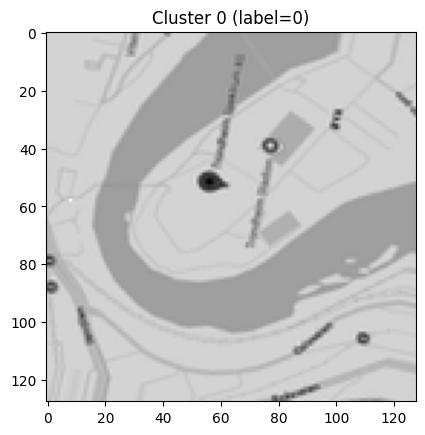

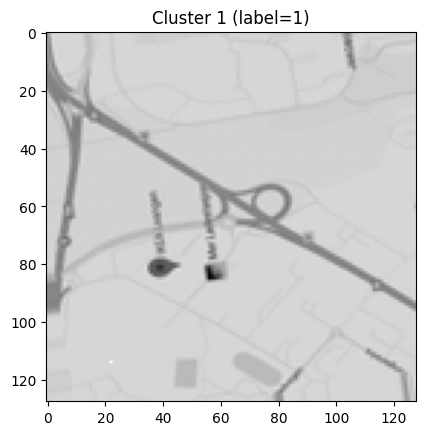

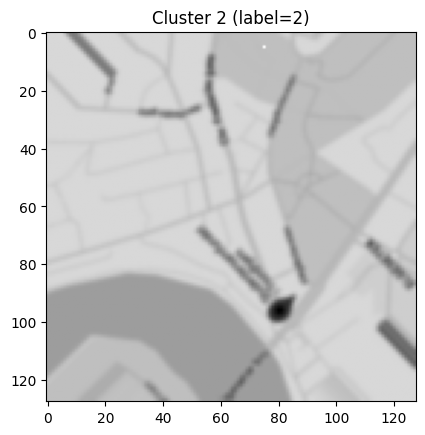

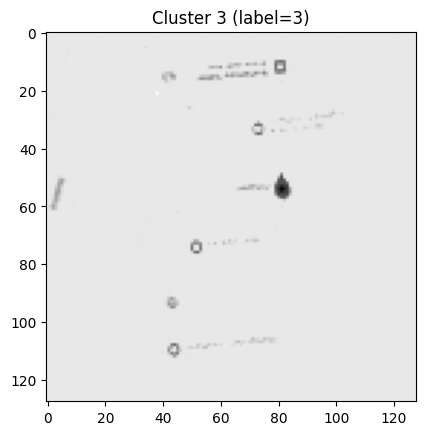

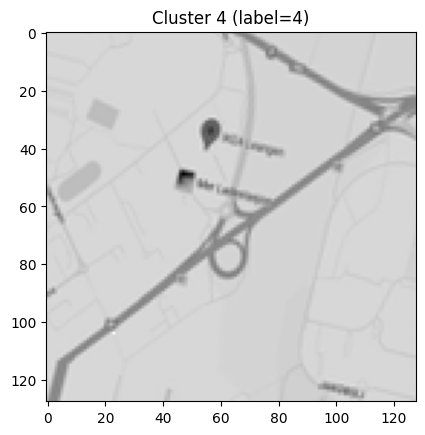

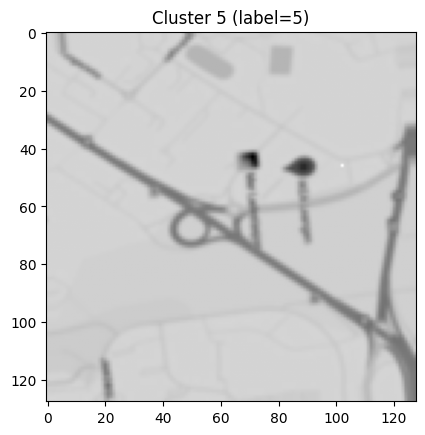

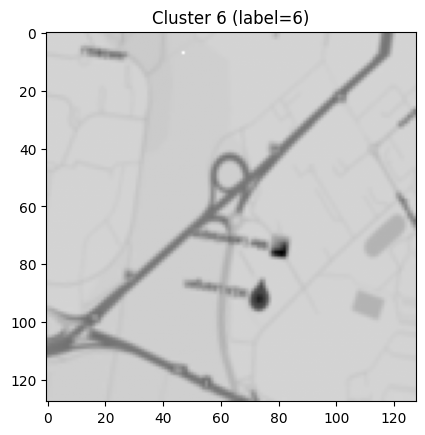

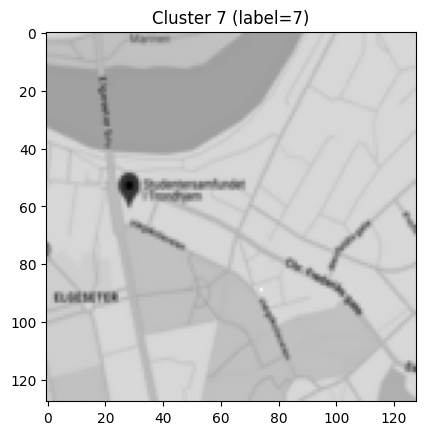

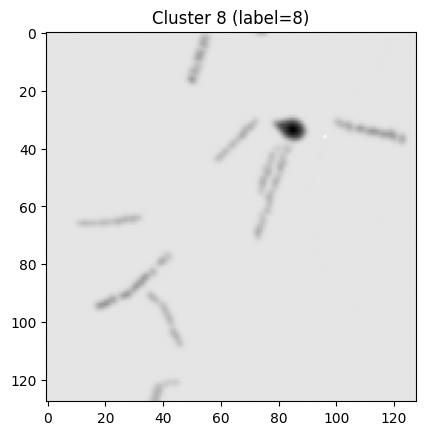

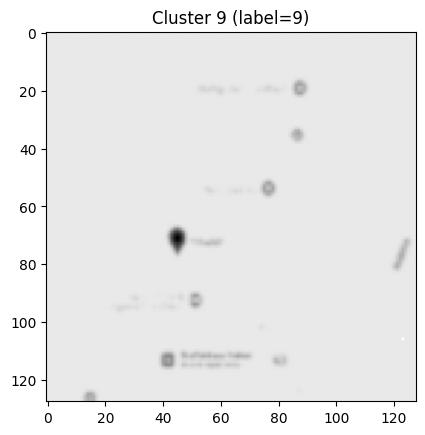

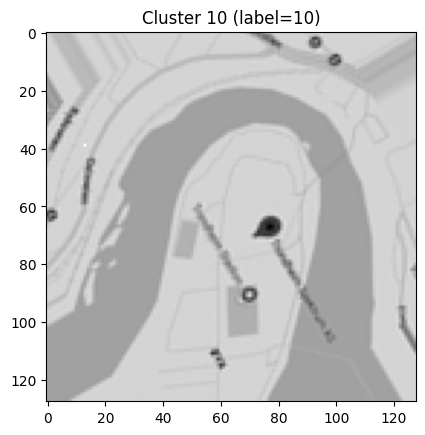

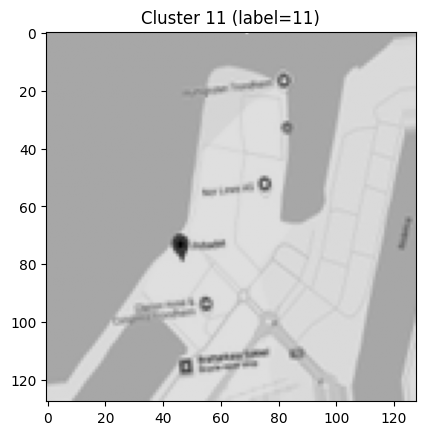

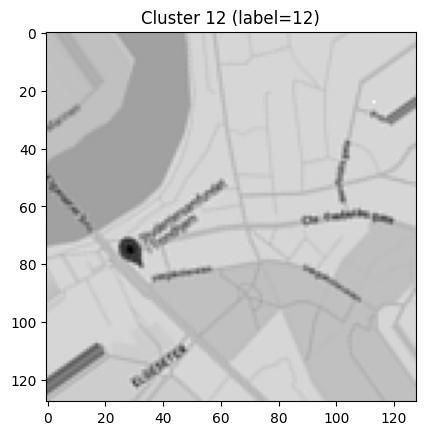

In [296]:
#Going over pictures to manually group related clusters
sample_indices = []
for cid in np.unique(labels):
    idx = np.where(labels == cid)[0][0]
    sample_indices.append(idx)

for i, idx in enumerate(sample_indices):
    img = features_sorted.iloc[idx].values.reshape(128, 128)
    plt.imshow(img, cmap='gray')
    plt.title(f"Cluster {i} (label={labels[idx]})")
    plt.show()

In [297]:
# Merging related clusters based on image data. All final clusters have 1000 datapoints each
merge_map = {
    0: 0, 10: 0,
    1: 1, 4: 1, 5: 1, 6: 1,
    2: 2, 7: 2, 8: 2, 12: 2,
    3: 3, 9: 3, 11: 3
}

final_labels = np.array([merge_map[l] for l in labels])
print(f"Merged labels: {collections.Counter(final_labels)}")

Merged labels: Counter({np.int64(0): 1000, np.int64(1): 1000, np.int64(2): 1000, np.int64(3): 1000})


In [298]:
# Generate submission
submission = pd.DataFrame({"ID": ids, "cluster": final_labels})
submission.to_csv("submission.csv", index=False)

# Discussion


## Dimensionality Reduction
Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.

For quickly visualizing the data, I first used PCA, and the UMAP to get a 2D image of the data, which showed clear clusters. I had issued getting stuck on 0.99 score however, so I went back and only used UMAP for the data that was passed to DBSCAN. UMAP is supposed to be better for image data, which is why I went this route. PCA was used mainly for its speed, considering the original dataset was ~16000D.

The difference between PCA, t-SNE, and UMAP is mainly how they reduce dimensionality. PCA is linear and fast, but cannot capture complex patterns. t-SNE is good at separating clusters visually but is slow and mainly useful only in 2D. UMAP keeps both local and global structure, works in higher dimensions, and gave the best results for clustering.


## Clustering Algorithm
Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.

For clustering I chose DBSCAN, after seeing how it worked at: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

With such defined clusters, I figured using a nearest neighbor approach would be best. K-means would work well too, as looking at the visualized data shows 12 defined clusters, giving us a good k-value estimate. K-means assumes spherical clusters and requires you to pick k in advance, and it struggles with irregular shapes or noise. DBSCAN, on the other hand, doesn’t need k, can find arbitrarily shaped clusters, and can mark outliers automatically. Since my data clearly had uneven cluster densities and non-circular shapes, DBSCAN felt like the better choice.

As for hyperparams, I used eps=0.45 after plotting possible good k-values and testing them out. As for min_samples, I used 10. This gave 13 clusters, which I then manually checked and merged into 4 clusters.


## Data Types
What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?

The hidden data type in the set are images. Each line defines an image of a location in Google Maps. Because these are images, each row is actually ordered pixel values, meaning nearby columns are spatially related. This matters because image data lies on a complex nonlinear manifold, so simple linear methods might not capture the true structure. This means UMAP (which preserves local and global structure) works better than PCA because PCA is linear and only captures global variance, losing important local image patterns

## Server Locations
The server locations are:

- Trondheim Spektrum
- IKEA Leangen
- Pirbadet
- Studentersamfundet

I deduced the locations by simply look at images for the clusters and cross-referencing with Google Maps



In [299]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster.
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to.
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7



---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [300]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [301]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [302]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [303]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)